In [67]:
library(tidyverse)
library(readxl)
ggplot2::theme_set(theme_classic())

In [19]:
adver <- read_excel("C:/Soongsil/R/실무 예제/abtest.xlsx", sheet = 1)

In [20]:
adver %>% glimpse

Rows: 43,968
Columns: 9
$ city1      <chr> "강원도", "강원도", "강원도", "강원도", "강원도", "강원도",~
$ city2      <chr> "강릉시", "강릉시", "강릉시", "강릉시", "강릉시", "강릉시",~
$ age        <dbl> 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,~
$ sex        <chr> "man", "man", "man", "man", "man", "man", "man", "man", "ma~
$ type       <chr> "A_GROUP", "A_GROUP", "A_GROUP", "A_GROUP", "A_GROUP", "A_G~
$ open       <dbl> 1503, 2314, 1978, 1821, 2204, 2229, 2208, 1843, 1530, 1387,~
$ click      <dbl> 6, 44, 11, 18, 40, 12, 24, 18, 15, 25, 2, 22, 5, 5, 13, 8, ~
$ conversion <dbl> 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,~
$ sales      <chr> "NA", "NA", "NA", "0", "21180", "0", "33920", "0", "0", "0"~


### 
### 결측값 제거

In [21]:
adver1 <- adver %>% 
    mutate(sales = ifelse(sales == "NA", NA, sales)) %>% 
    na.omit() %>% glimpse

Rows: 40,304
Columns: 9
$ city1      <chr> "강원도", "강원도", "강원도", "강원도", "강원도", "강원도",~
$ city2      <chr> "강릉시", "강릉시", "강릉시", "강릉시", "강릉시", "강릉시",~
$ age        <dbl> 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,~
$ sex        <chr> "man", "man", "man", "man", "man", "man", "man", "man", "ma~
$ type       <chr> "A_GROUP", "A_GROUP", "A_GROUP", "A_GROUP", "A_GROUP", "A_G~
$ open       <dbl> 1821, 2204, 2229, 2208, 1843, 1530, 1387, 1196, 1136, 1086,~
$ click      <dbl> 18, 40, 12, 24, 18, 15, 25, 2, 22, 5, 5, 13, 8, 4, 14, 18, ~
$ conversion <dbl> 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,~
$ sales      <chr> "0", "21180", "0", "33920", "0", "0", "0", "0", "0", "0", "~


In [29]:
unique(adver1$city1) %>% head ; 

[1] "강원도"     "경기도"     "경상남도"   "경상북도"   "광주광역시"
[6] "대구광역시"

[1] "강릉시" "고성군" "동해시" "삼척시" "속초시" "양구군"

In [36]:
unique(adver1$city1) 
unique(adver1$city2) %>% head
unique(adver1$sex)
unique(adver1$type)

[1] "강원도"         "경기도"         "경상남도"       "경상북도"      
 [5] "광주광역시"     "대구광역시"     "대전광역시"     "부산광역시"    
 [9] "서울특별시"     "세종특별자치시" "울산광역시"     "인천광역시"    
[13] "전라남도"       "전라북도"       "제주특별자치도" "충청남도"      
[17] "충청북도"

[1] "강릉시" "고성군" "동해시" "삼척시" "속초시" "양구군"

[1] "man"   "woman"

[1] "A_GROUP" "B_GROUP"

## 
### 통계적 검정 (가설검정)

### A/B test : 독립표본 t검정
#### 귀무가설 : 'A_GROUP과 B_GROUP의 평균에는 차이가 없다'
**광고 성과 측정 지표 : 광고 메일을 연 횟수 (open), 광고를 클릭한 횟수 (click), 구매전환 수 (conversion)**

1. **정규성 검정**
2. **등분산 검정**
3. **독립표본 t검정**


In [39]:
A <- adver1 %>% filter(type == 'A_GROUP')
B <- adver1 %>% filter(type == 'B_GROUP')
A %>% dim ; B %>% dim

[1] 20152     9

[1] 20152     9

### 
### 정규성 검정
#### 귀무가설 : 데이터는 정규분포를 따른다


### 
#### **5000건 이하의 데이터**
### ```shapiro.test()``` : 샤피로-윌크 검정 (Shapiro-Wilk)

### 

#### **5000건 이상의 데이터**
### ```nortest::ad.test()``` : 앤더슨-달링 검정 (Anderson-Darling)

In [40]:
library(nortest)

#### A_GROUP 광고 성과 지표의 정규성 검정 => A_GROUP의 모든 광고 성과 지표는 정규성 불만족

In [44]:
nortest::ad.test(A$open)


	Anderson-Darling normality test

data:  A$open
A = 1422.6, p-value < 2.2e-16


In [45]:
nortest::ad.test(A$click)


	Anderson-Darling normality test

data:  A$click
A = 2072.8, p-value < 2.2e-16


In [46]:
nortest::ad.test(A$conversion)


	Anderson-Darling normality test

data:  A$conversion
A = 3351.7, p-value < 2.2e-16


#### B_GROUP 광고 성과 지표의 정규성 검정 => A_GROUP의 모든 광고 성과 지표는 정규성 불만족

In [47]:
nortest::ad.test(B$open)


	Anderson-Darling normality test

data:  B$open
A = 1422.6, p-value < 2.2e-16


In [48]:
nortest::ad.test(B$click)


	Anderson-Darling normality test

data:  B$click
A = 2112.3, p-value < 2.2e-16


In [49]:
nortest::ad.test(B$conversion)


	Anderson-Darling normality test

data:  B$conversion
A = 2715.6, p-value < 2.2e-16


### 
### 등분산 검정
#### 귀무가설 : 집단 간에 등분산 만족


### 
#### **정규성 만족 시**
### ```var.test(A, B)```

### 

#### **정규성 불만족 시**
### ```car::LeveneTest(y, group)``` 
- ```y``` : 검정하는 변수
- ```group``` : 범주 

####  광고 성과 지표의 A_GROUP과 B_GROUP간 등분산 검정
- **open은 A_GROUP과 B_GROUP간 등분산성 만족**
- **click과 conversion은 A_GROUP과 B_GROUP간 등분산성 불만족**

In [56]:
library(car)

In [57]:
car::leveneTest(y = adver1$open, group = factor(adver1$type))
# var.test(A$open, B$open)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.196354e-26,1
,40302,NA,NA


In [60]:
car::leveneTest(y = adver1$click, group = factor(adver1$type))

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1617.348,0
,40302,NA,NA


In [61]:
car::leveneTest(y = adver1$conversion, group = factor(adver1$type))

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3262.103,0
,40302,NA,NA


### 
### t검정 (독립표본 t검정) 
#### 귀무가설 : 두 집단간 평균의 차이는 없다

### ```t.test(A, B)```

#### A_GROUP과 B_GROUP간 광고 성과 지표의 평균의 차이 
- **open은 A_GROUP과 B_GROUP간 평균의 차이가 없다**

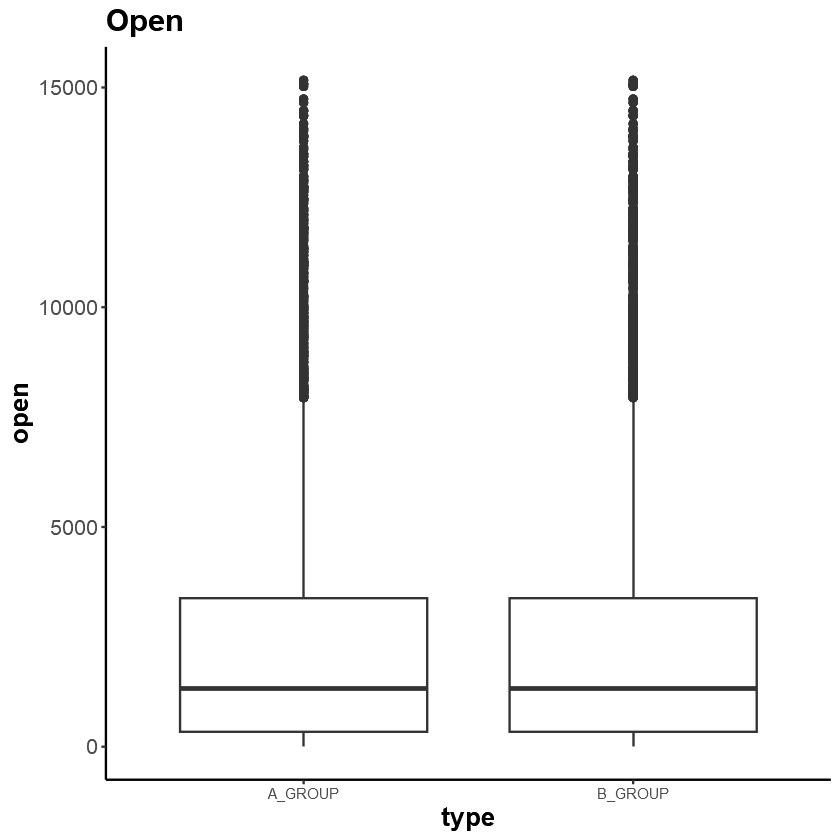

In [78]:
ggplot(adver1, aes(type, open)) + geom_boxplot(aes(group = type)) +
    ggtitle("Open") + 
    theme(title = element_text(size = 15, face = 'bold'),
          axis.text.y = element_text(size = 12))

In [64]:
t.test(A$open, B$open)


	Welch Two Sample t-test

data:  A$open and B$open
t = 0, df = 40302, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.4458  56.4458
sample estimates:
mean of x mean of y 
 2450.751  2450.751 


### 
- **click과 conversion은 A_GROUP과 B_GROUP간 평균의 차이가 있다**

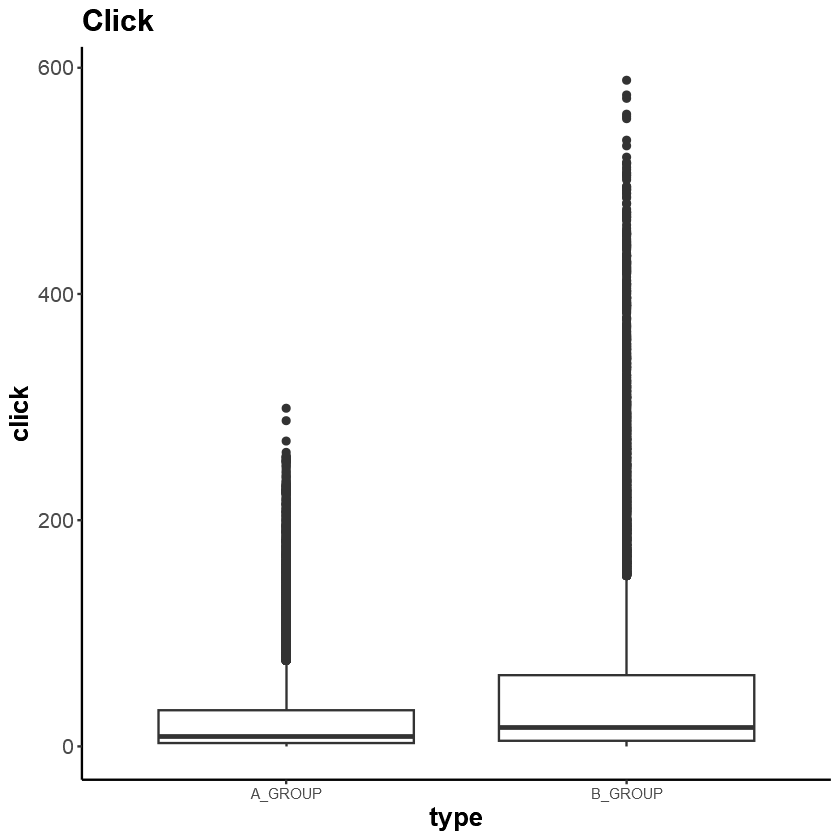

In [80]:
ggplot(adver1, aes(type, click)) + geom_boxplot(aes(group = type)) +
    ggtitle("Click") + 
    theme(title = element_text(size = 15, face = 'bold'),
          axis.text.y = element_text(size = 12))

In [65]:
t.test(A$click, B$click)


	Welch Two Sample t-test

data:  A$click and B$click
t = -42.204, df = 29470, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25.42244 -23.16589
sample estimates:
mean of x mean of y 
 24.59339  48.88755 


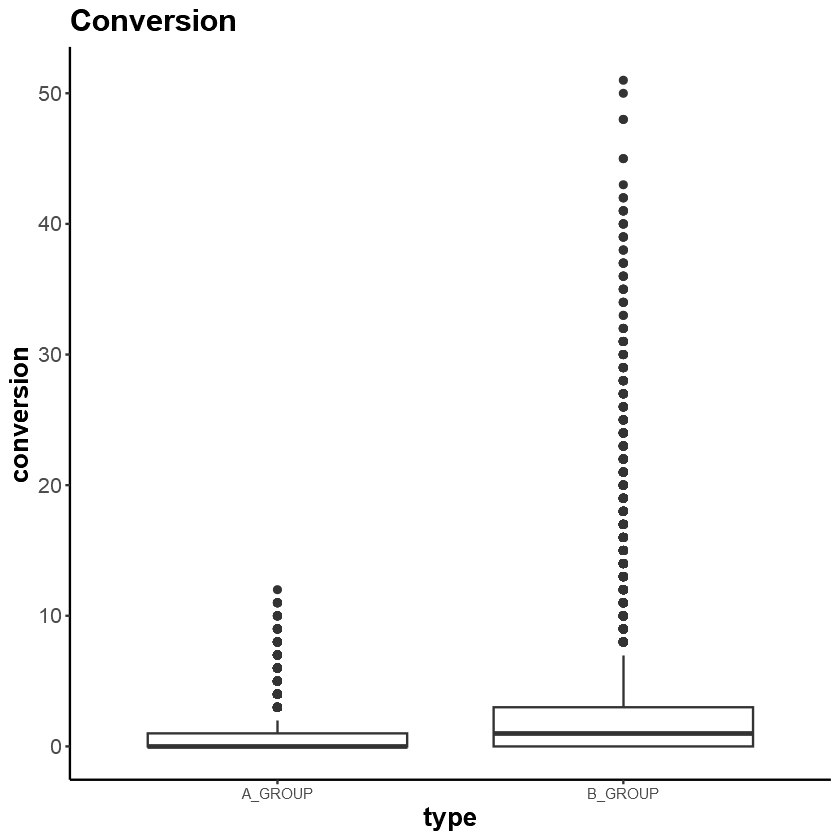

In [81]:
ggplot(adver1, aes(type, conversion)) + geom_boxplot(aes(group = type)) +
    ggtitle("Conversion") + 
    theme(title = element_text(size = 15, face = 'bold'),
          axis.text.y = element_text(size = 12))

In [66]:
t.test(A$conversion, B$conversion)


	Welch Two Sample t-test

data:  A$conversion and B$conversion
t = -56.007, df = 22770, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.90929 -1.78017
sample estimates:
mean of x mean of y 
0.5583069 2.4030369 
